# BL40A2030 Wireless Communication Networks

## Week 7: Wireless networks - Outage probability and statistical metrics

## Author: Pedro Nardelli

### References 

#### Markdown syntax for writing in the notebook

[Markdown syntax](https://help.github.com/articles/basic-writing-and-formatting-syntax/)

#### Library for numerical calculation in Python

[Numpy](http://www.numpy.org/)

#### Symbolic calculation

[SymPy](https://docs.sympy.org/latest/index.html)


#### Plot in Python

[Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)

#### Mathematical functions (like Gamma)

[Math](https://docs.python.org/3/library/math.html)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as sp
from matplotlib import style
import math
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

# Optimization

## Closed-form with Rayleigh fading (i.i.d. exponential channel gains): $ P_o = 1 - e^{- \kappa \lambda \pi d^2 \beta^{2/\alpha}}$

- $\alpha$ is the path-loss exponent
- $\lambda$ is the density of the PPP related to the transmitters
- $d$ is the TX-RX distance (the reference link, or all links in bipolar networks)
- $\beta$ is the SIR threshold that leads to a spectral efficiency of $\log_2(1+\beta)$

# Performance metrics

### 1) Expected forward progress: $d (1-P_o) =  d  e^{- \kappa \lambda \pi d^2 \beta^{2/\alpha}}$

### Optimization in terms of $d$: $\dfrac{\mathrm{d}}{\mathrm{d}d}  \left(d e^{- \kappa \lambda \pi d^2 \beta^{2/\alpha}}\right) = 0$ 

Let's use sympy

In [2]:
sp.init_printing()
#Defining variables
d2, lamb2, beta2, alpha2, kappa2 = sp.symbols('d lambda beta alpha kappa', real = True, positive = True)

In [3]:
# (1) Defining the variables and functions

#Success probability
p_s= sp.exp(- kappa2* lamb2 * sp.pi * d2**2 * beta2**(2/alpha2))

#EP
EP = d2 * p_s

EP

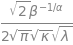

In [4]:
# (2) Solving the derivative equation -> finding d that optimized EFP

d_opt = sp.solve(sp.diff(EP,d2),d2)
d_opt[0]

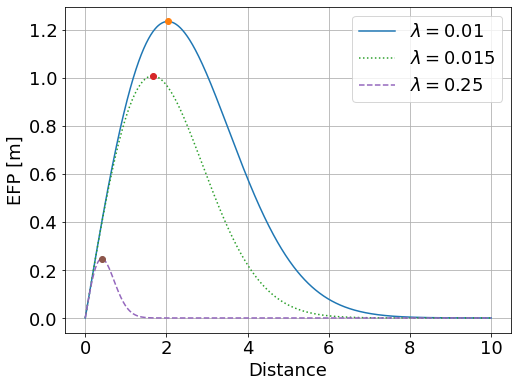

In [5]:
#SIR threshold
beta=2
#Path-loss
alpha=3
#Constant from Rayleigh fading 
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
#Distance array
d = np.linspace(0,10,1000)
####Converting SYMPY to NUMPY -- function of the density lamb2
d_optimal_np_aux = sp.lambdify(lamb2,sp.N(d_opt[0].subs(beta2,beta).subs(alpha2,alpha).subs(kappa2,kappa)),"numpy")
#
#Numerical value
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8,6))
#Network density
lamb = 0.01
#####
d_optimal_np = d_optimal_np_aux(lamb)
plt.plot(d, d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) , '-' , label=r'$\lambda=0.01$')
plt.plot(d_optimal_np, d_optimal_np * np.exp(-kappa * lamb * d_optimal_np**2 * np.pi * beta**(2/alpha)) , 'o')
#Network density
lamb = 0.015
d_optimal_np = d_optimal_np_aux(lamb)
plt.plot(d, d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) , ':' , label=r'$\lambda=0.015$')
plt.plot(d_optimal_np, d_optimal_np * np.exp(-kappa * lamb * d_optimal_np**2 * np.pi * beta**(2/alpha)) , 'o')
#Network density
lamb = 0.25
d_optimal_np = d_optimal_np_aux(lamb)
plt.plot(d, d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) ,'--' , label=r'$\lambda=0.25$')
plt.plot(d_optimal_np, d_optimal_np * np.exp(-kappa * lamb * d_optimal_np**2 * np.pi * beta**(2/alpha)) , 'o')
#######
plt.xlabel("Distance")
plt.ylabel("EFP [m]")
plt.grid()
plt.legend()
plt.show()

### 2) Information efficiency: $d \times  e^{- \kappa \lambda \pi d^2 \beta^{2/\alpha}} \times \log_2(1+\beta)$

- We assume Shannon to related the spectral efficiency in [bits/s/Hz] with the SIR threshold.
- Optimization in terms of $\beta$

In [6]:
# (1) Defining the variables and functions

#EP
IE = d2 * p_s * sp.log(1+beta2)/sp.log(2)

IE

In [7]:
# (2) Solving the derivative equation -> finding d that optimized EFP

beta_opt = sp.solve(sp.diff(IE,beta2),beta2)
beta_opt[0]

NotImplementedError: multiple generators [beta, beta**(1/alpha), exp(pi*beta**(2/alpha)*d**2*kappa*lambda), log(beta + 1)]
No algorithms are implemented to solve equation d*exp(-pi*beta**(2/alpha)*d**2*kappa*lambda)/((beta + 1)*log(2)) - 2*pi*beta**(2/alpha)*d**3*kappa*lambda*exp(-pi*beta**(2/alpha)*d**2*kappa*lambda)*log(beta + 1)/(alpha*beta*log(2))

In [ ]:
#Conditions of existence of solution -> https://docs.sympy.org/latest/tutorial/solvers.html
beta_opt = sp.solveset(sp.diff(IE, beta2),beta2)
beta_opt

In [ ]:
#Checking the derivative -- transcendental equation
IE_dif = sp.simplify(sp.diff(IE,beta2))
IE_dif

In [ ]:
#Numerical solution 1
d=1
alpha=3
lamb=0.1
sp.solve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lamb).subs(d2,d),beta2,1)

In [10]:
#Numerical solution 2
d=1
alpha=3
lamb=0.1
#### NOte that the last input in the nsolve is where the solution should be around; many times you need to figure out this yourself.
sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lamb).subs(d2,d),beta2,0.1)

NameError: name 'IE_dif' is not defined

In [11]:
#Path-loss
alpha=3
#Constant from Rayleigh fading 
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
#Network density
lamb = 0.05
#SIR threshold array
beta = np.linspace(0,8,300)
#####
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
#distance
d=1
beta_opt_aux = sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lamb).subs(d2,d),beta2,0.1)
beta_opt_np = sp.lambdify([],beta_opt_aux,"numpy")
plt.plot(beta, d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) , '-' , label=r'$d=1$')
plt.plot(beta_opt_np(), d * np.exp(-kappa * lamb * d**2 * np.pi * beta_opt_np()**(2/alpha))* np.log2(1+beta_opt_np()) ,'o')
#distance
d=2
beta_opt_aux = sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lamb).subs(d2,d),beta2,0.1)
beta_opt_np = sp.lambdify([],beta_opt_aux,"numpy")
plt.plot(beta, d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta), ':' , label=r'$d=2$')
plt.plot(beta_opt_np(), d * np.exp(-kappa * lamb * d**2 * np.pi * beta_opt_np()**(2/alpha))* np.log2(1+beta_opt_np()) ,'o')
######
d=3
beta_opt_aux = sp.nsolve(IE_dif.subs(alpha2,alpha).subs(kappa2,kappa).subs(lamb2,lamb).subs(d2,d),beta2,0.1)
beta_opt_np = sp.lambdify([],beta_opt_aux,"numpy")
plt.plot(beta, d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha))* np.log2(1+beta) ,'--' , label=r'$d=3$')
plt.plot(beta_opt_np(), d * np.exp(-kappa * lamb * d**2 * np.pi * beta_opt_np()**(2/alpha))* np.log2(1+beta_opt_np()) ,'o')
#######
plt.xlabel("SIR threshold")
plt.ylabel("IE [bits-m/s/Hz]")
plt.grid()
plt.legend()
plt.show()

NameError: name 'IE_dif' is not defined

<Figure size 1008x576 with 0 Axes>

### 3) Spatial throughput/Area spectral efficiency (for bipolar networks): $\lambda \times  e^{- \kappa \lambda \pi d^2 \beta^{2/\alpha}} \times \log_2(1+\beta)$

- Bipolar network
- Optimization in terms of $\lambda$

In [8]:
# (1) Defining the variables and functions

#EP
ST = lamb2 * p_s * sp.log(1+beta2)/sp.log(2)

ST

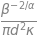

In [9]:
# (2) Solving the derivative equation -> finding d that optimized EFP

lamb_opt = sp.solve(sp.diff(ST,lamb2),lamb2)
lamb_opt[0]

In [ ]:
lamb_optimal_np_aux = sp.lambdify([],sp.N(lamb_opt[0].subs(beta2,beta).subs(alpha2,alpha).subs(kappa2,kappa).subs(d2,d)),"numpy")
lamb_optimal_np = lamb_optimal_np_aux()
lamb_optimal_np 

In [ ]:
#Path-loss
alpha=3
#Constant from Rayleigh fading 
kappa = math.gamma(1 + 2/alpha) * math.gamma(1- 2/alpha)
#Network density
lamb = np.linspace(0,0.4,200)
#####
#####
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
###########
#distance
d=1
#SIR th
beta=1
##
####Converting SYMPY to NUMPY -- function of the density lamb2
lamb_optimal_np_aux = sp.lambdify([],sp.N(lamb_opt[0].subs(beta2,beta).subs(alpha2,alpha).subs(kappa2,kappa).subs(d2,d)),"numpy")
lamb_optimal_np = lamb_optimal_np_aux()
plt.plot(lamb, lamb * d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) , '-' , label=r'$d=1,\beta=1$')
plt.plot(lamb_optimal_np, lamb_optimal_np * d * np.exp(-kappa * lamb_optimal_np * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) , 'o' )
#distance
d=1
#SIR th
beta=3
####Converting SYMPY to NUMPY -- function of the density lamb2
lamb_optimal_np_aux = sp.lambdify([],sp.N(lamb_opt[0].subs(beta2,beta).subs(alpha2,alpha).subs(kappa2,kappa).subs(d2,d)),"numpy")
lamb_optimal_np = lamb_optimal_np_aux()
plt.plot(lamb, lamb * d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta), ':' , label=r'$d=1,\beta=3$')
plt.plot(lamb_optimal_np, lamb_optimal_np * d * np.exp(-kappa * lamb_optimal_np * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) , 'o' )
###########
#distance
d=3
#SIR th
beta=1
####Converting SYMPY to NUMPY -- function of the density lamb2
lamb_optimal_np_aux = sp.lambdify([],sp.N(lamb_opt[0].subs(beta2,beta).subs(alpha2,alpha).subs(kappa2,kappa).subs(d2,d)),"numpy")
lamb_optimal_np = lamb_optimal_np_aux()
plt.plot(lamb, lamb * d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha))* np.log2(1+beta) ,'--' , label=r'$d=3,\beta=1$')
plt.plot(lamb_optimal_np, lamb_optimal_np * d * np.exp(-kappa * lamb_optimal_np * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) , 'o' )
###########
#distance
d=3
#SIR th
beta=3
####Converting SYMPY to NUMPY -- function of the density lamb2
lamb_optimal_np_aux = sp.lambdify([],sp.N(lamb_opt[0].subs(beta2,beta).subs(alpha2,alpha).subs(kappa2,kappa).subs(d2,d)),"numpy")
lamb_optimal_np = lamb_optimal_np_aux()
plt.plot(lamb, lamb *  d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha))* np.log2(1+beta) ,'-.' ,label=r'$d=3,\beta=3$')
plt.plot(lamb_optimal_np, lamb_optimal_np * d * np.exp(-kappa * lamb_optimal_np * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) , 'o' )
###########
###########
#distance
d=2
#SIR th
beta=2
####Converting SYMPY to NUMPY -- function of the density lamb2
lamb_optimal_np_aux = sp.lambdify([],sp.N(lamb_opt[0].subs(beta2,beta).subs(alpha2,alpha).subs(kappa2,kappa).subs(d2,d)),"numpy")
lamb_optimal_np = lamb_optimal_np_aux()
plt.plot(lamb, lamb *  d * np.exp(-kappa * lamb * d**2 * np.pi * beta**(2/alpha))* np.log2(1+beta) ,'-' ,label=r'$d=2,\beta=2$')
plt.plot(lamb_optimal_np, lamb_optimal_np * d * np.exp(-kappa * lamb_optimal_np * d**2 * np.pi * beta**(2/alpha)) * np.log2(1+beta) , 'o' )
###########
plt.xlabel("Network density")
plt.ylabel("ST [bits/s/Hz/m^2]")
plt.grid()
plt.legend()
plt.show()

### Try yourself with all metrics with different values